<a href="https://colab.research.google.com/github/hosein-jamshidian/Sentiment_Analyses_SnappFood/blob/main/SentimentAnalysis_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Import dataset

In [5]:
!unzip /content/DL-HW3.zip
!rm /content/DL-HW3.zip
!rm /content/DL-HW3/DL-HW3-Description.pdf

Archive:  /content/DL-HW3.zip
  inflating: DL-HW3/DL-HW3-Description.pdf  
   creating: DL-HW3/Snappfood-Dataset/
  inflating: DL-HW3/Snappfood-Dataset/dev.csv  
  inflating: DL-HW3/Snappfood-Dataset/test.csv  
  inflating: DL-HW3/Snappfood-Dataset/train.csv  


In [6]:
train_df=pd.read_csv('/content/DL-HW3/Snappfood-Dataset/train.csv',sep='\t',index_col=0)
val_df=pd.read_csv('/content/DL-HW3/Snappfood-Dataset/dev.csv',sep='\t',index_col=0)
test_df=pd.read_csv('/content/DL-HW3/Snappfood-Dataset/test.csv',sep='\t',index_col=0)

In [8]:
train_df.head()

,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


In [9]:
train_df['label'].value_counts()

SAD      28350
HAPPY    28350
Name: label, dtype: int64

## visualization

In [10]:
! pip install hazm
import hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.8/352.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 24.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.1 which is incompatible.


In [11]:
train_df['sent_len']=train_df['comment'].apply(lambda x : len(hazm.word_tokenize(x)))

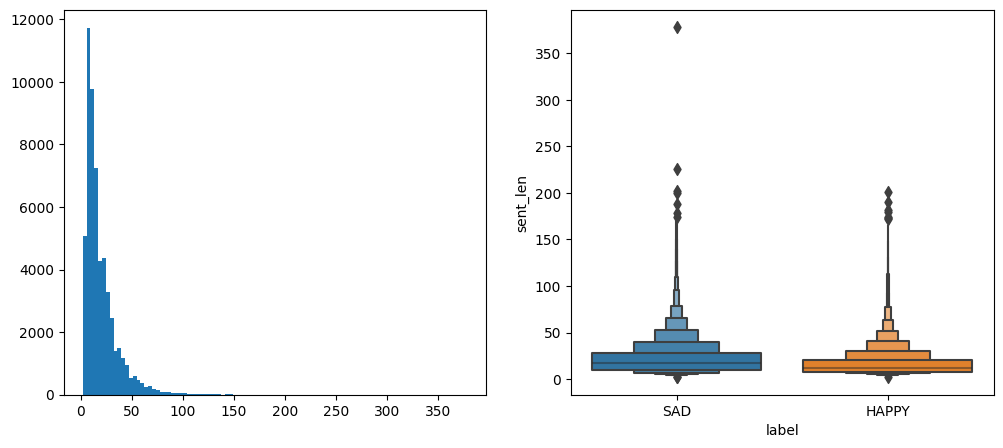

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(train_df['sent_len'], bins=100)
plt.subplot(1,2,2)
sns.boxenplot(x="label",y="sent_len",data=train_df)
plt.show()

In [13]:
COMMENT_MAX_LEN=50
train_df['sent_len']=train_df['comment'].apply(lambda x : len(hazm.word_tokenize(x)[:COMMENT_MAX_LEN]))

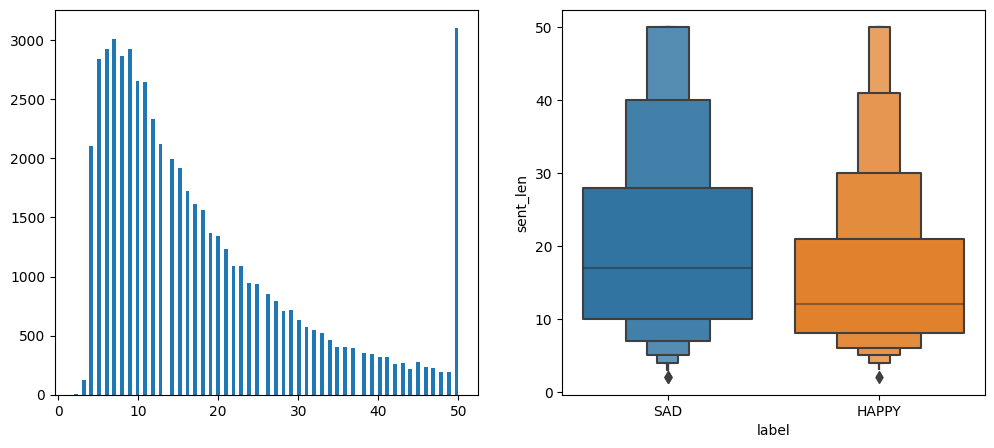

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(train_df['sent_len'], bins=100)
plt.subplot(1,2,2)
sns.boxenplot(x="label",y="sent_len",data=train_df)
plt.show()

### Remove comment with less than 3 charachter

In [15]:
train_df=train_df.drop(train_df[train_df['sent_len'] <= 3].index,axis=0).reset_index(drop=True)


val_df['sent_len']=val_df['comment'].apply(lambda x : len(hazm.word_tokenize(x)))
val_df=val_df.drop(val_df[val_df['sent_len'] <= 3].index,axis=0).reset_index(drop=True)

# preprocessing and clean comments

In [16]:
!pip install finglish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 16.6 MB/s eta 0:00:00


In [17]:
import nltk
import hazm
from finglish import f2p
import re

Loading converters...
Loading persian word list...
Loading dictionary...


In [18]:
hazm_normalizer=hazm.Normalizer()

In [19]:
def cleaning(sent):
  wierd_pattern=re.compile("["
      u"\U0001F600-\U0001F64F"  # emoticons
      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
      u"\U0001F680-\U0001F6FF"  # transport & map symbols
      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
      u"\U00002702-\U000027B0"
      u"\U000024C2-\U0001F251"
      u"\U0001f926-\U0001f937"
      u'\U00010000-\U0010ffff'
      u"\u200d"
      u"\u2640-\u2642"
      u"\u2600-\u2B55"
      u"\u23cf"
      u"\u23e9"
      u"\u231a"
      u"\u3030"
      u"\ufe0f"
      u"\u2069"
      u"\u2066"
      u"\u200c"
      u"\u2068"
      u"\u2067"
      "]+", flags=re.UNICODE)
  sent = wierd_pattern.sub(r'', sent)

  if(bool(re.match('^[a-zA-Z]',sent))==True):
    sent=f2p(sent)

  sent = re.sub("#", "", sent)
  sent = re.sub("\s+", " ", sent)

  return sent

In [20]:
# import string
# lemmatizer=hazm.Lemmatizer()
# def tokenize(sent):
#     clean=[lemmatizer.lemmatize(word).split("#")[0] for word in hazm.word_tokenize(sent) if (word not in string.punctuation + "٬" + "،")]
#     return ' '.join(clean)

In [21]:
# normalizing
normalizer=hazm.Normalizer()

train_df['comment']= train_df['comment'].apply(lambda x : normalizer.normalize(x))
val_df['comment']= val_df['comment'].apply(lambda x : normalizer.normalize(x))
test_df['comment']= test_df['comment'].apply(lambda x : normalizer.normalize(x))

In [22]:
train_df['comment']= train_df['comment'].apply(cleaning)
val_df['comment']= val_df['comment'].apply(cleaning)
test_df['comment']= test_df['comment'].apply(cleaning)

In [23]:
# fix features type
train_df = train_df.astype({'label_id': 'int', 'label': 'str', 'comment': 'str'})
val_df = val_df.astype({'label_id': 'int', 'label': 'str', 'comment': 'str'})
test_df = test_df.astype({'label_id': 'int', 'label': 'str', 'comment': 'str'})

In [24]:
train_df = train_df[['comment', 'label_id']]
val_df = val_df[['comment', 'label_id']]
test_df = test_df[['comment', 'label_id']]

In [25]:
# train test split
x_train, y_train = train_df['comment'].values.tolist(), train_df['label_id'].values.tolist()
x_val, y_val = val_df['comment'].values.tolist(), val_df['label_id'].values.tolist()
x_test, y_test = test_df['comment'].values.tolist(), test_df['label_id'].values.tolist()

# BERT requierment libraries

In [26]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.1 MB/s eta 0:00:00


In [27]:
from transformers import BertConfig, BertTokenizer,BertModel,AdamW,get_linear_schedule_with_warmup
from transformers import TFBertModel, TFBertForSequenceClassification
from transformers import glue_convert_examples_to_features

import tensorflow as tf

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import string
import json

from tqdm.notebook import tqdm

# configuration

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda:0
CUDA is available!  Training on GPU ...


In [30]:
MAX_LEN = 50

EEVERY_EPOCH = 1000

CLIP = 0.0

MODEL_NAME_OR_PATH = 'HooshvareLab/bert-fa-base-uncased'
OUTPUT_PATH = '/content/model.bin'

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

In [31]:
label2id = {'SAD': 1, 'HAPPY': 0}
id2label = {1: 'SAD', 0: 'HAPPY'}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'SAD': 1, 'HAPPY': 0}
id2label: {1: 'SAD', 0: 'HAPPY'}


## Calling for bert tokenizer

In [32]:
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME_OR_PATH)
config = BertConfig.from_pretrained(MODEL_NAME_OR_PATH, **{'label2id': label2id,'id2label': id2label})
print(config.to_json_string())

{
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "HAPPY",
    "1": "SAD"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "HAPPY": 0,
    "SAD": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}



## Create class to Create embedding vec and masked attention vec and ...

In [33]:
class InputExample:
    def __init__(self, guid, text_a, text_b=None, label=None):
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label


def make_examples(tokenizer, x, y=None, maxlen=50, output_mode="classification", is_tf_dataset=True):
    examples = []
    y = y if isinstance(y, list) or isinstance(
        y, np.ndarray) else [None] * len(x)

    for i, (_x, _y) in tqdm(enumerate(zip(x, y)), position=0, total=len(x)):
        guid = "%s" % i
        label = int(_y)

        if isinstance(_x, str):
            text_a = _x
            text_b = None
        else:
            assert len(_x) == 2
            text_a = _x[0]
            text_b = _x[1]

        examples.append(InputExample(guid=guid, text_a=text_a, text_b=text_b, label=label))

    features = glue_convert_examples_to_features(
        examples,
        tokenizer,
        maxlen,
        output_mode=output_mode,
        label_list=list(np.unique(y)))

    all_input_ids = []
    all_attention_masks = []
    all_token_type_ids = []
    all_labels = []

    for f in tqdm(features, position=0, total=len(examples)):
        if is_tf_dataset:
            all_input_ids.append(tf.constant(f.input_ids))
            all_attention_masks.append(tf.constant(f.attention_mask))
            all_token_type_ids.append(tf.constant(f.token_type_ids))
            all_labels.append(tf.constant(f.label))
        else:
            all_input_ids.append(f.input_ids)
            all_attention_masks.append(f.attention_mask)
            all_token_type_ids.append(f.token_type_ids)
            all_labels.append(f.label)

    if is_tf_dataset:
        dataset = tf.data.Dataset.from_tensor_slices(({
            'input_ids': all_input_ids,
            'attention_mask': all_attention_masks,
            'token_type_ids': all_token_type_ids
        }, all_labels))

        return dataset, features

    xdata = [np.array(all_input_ids), np.array(all_attention_masks), np.array(all_token_type_ids)]
    ydata = all_labels

    return [xdata, ydata], features

In [34]:
train_dataset_base, train_examples = make_examples(tokenizer, x_train, y_train, maxlen=50)
valid_dataset_base, valid_examples = make_examples(tokenizer, x_val, y_val, maxlen=50)

test_dataset_base, test_examples = make_examples(tokenizer, x_test, y_test, maxlen=50)
[xtest, ytest], test_examples = make_examples(tokenizer, x_test, y_test, maxlen=50, is_tf_dataset=False)

  0%|          | 0/56569 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/data/processors/glue.py:66: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)


  0%|          | 0/56569 [00:00<?, ?it/s]

  0%|          | 0/6285 [00:00<?, ?it/s]

  0%|          | 0/6285 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

## create bacth on train and val dataset

In [35]:
def get_training_dataset(dataset, batch_size):
    dataset = dataset.repeat()
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(batch_size)

    return dataset

In [36]:
def get_validation_dataset(dataset, batch_size):
    dataset = dataset.batch(batch_size)

    return dataset

In [37]:
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
TEST_BATCH_SIZE = 16


train_dataset = get_training_dataset(train_dataset_base, TRAIN_BATCH_SIZE)
valid_dataset = get_training_dataset(valid_dataset_base, VALID_BATCH_SIZE)

train_steps = len(train_examples) // TRAIN_BATCH_SIZE
valid_steps = len(valid_examples) // VALID_BATCH_SIZE

train_steps, valid_steps

(3535, 392)

## Build model

In [38]:
def build_model(model_name, config, learning_rate=.000001):
    model = TFBertForSequenceClassification.from_pretrained(
        model_name, config=config)

    optimizer = tf.keras.optimizers.AdamW(learning_rate=learning_rate)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model

In [39]:
LEARNING_RATE = .00001
model = build_model(MODEL_NAME_OR_PATH, config, learning_rate=LEARNING_RATE)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Learning model

In [40]:
EPOCHS = 5

history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    epochs=EPOCHS,
    verbose=1)

Epoch 1/5
3535/3535 [==============================] - 882s 232ms/step - loss: 0.3276 - accuracy: 0.8618 - val_loss: 0.3027 - val_accuracy: 0.8771
Epoch 2/5
3535/3535 [==============================] - 785s 222ms/step - loss: 0.2666 - accuracy: 0.8904 - val_loss: 0.3169 - val_accuracy: 0.8737
Epoch 3/5
3535/3535 [==============================] - 785s 222ms/step - loss: 0.2111 - accuracy: 0.9167 - val_loss: 0.3321 - val_accuracy: 0.8702
Epoch 4/5
3535/3535 [==============================] - 783s 222ms/step - loss: 0.1532 - accuracy: 0.9414 - val_loss: 0.4079 - val_accuracy: 0.8603
Epoch 5/5
3535/3535 [==============================] - 798s 226ms/step - loss: 0.1057 - accuracy: 0.9612 - val_loss: 0.5336 - val_accuracy: 0.8512


In [41]:
model.save_pretrained(os.path.dirname(OUTPUT_PATH))

# Evaluation

In [42]:
from sklearn.metrics import classification_report

ev = model.evaluate(test_dataset_base.batch(TEST_BATCH_SIZE))
print(f'\nEvaluation: {ev}')


predictions = model.predict(xtest)
ypred = predictions[0].argmax(axis=-1).tolist()

print(classification_report(ytest, ypred, target_names=['SAD', 'HAPPY']))

438/438 [==============================] - 31s 71ms/step - loss: 0.4991 - accuracy: 0.8593

Evaluation: [0.4990745782852173, 0.8592857122421265]
219/219 [==============================] - 29s 118ms/step
              precision    recall  f1-score   support

         SAD       0.86      0.85      0.86      3500
       HAPPY       0.86      0.87      0.86      3500

    accuracy                           0.86      7000
   macro avg       0.86      0.86      0.86      7000
weighted avg       0.86      0.86      0.86      7000



Text(0.5, 1.0, 'Loss')

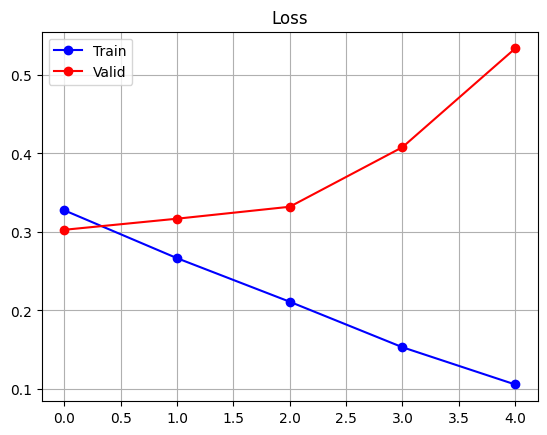

In [43]:
plt.plot(history.history['loss'], 'bo-', label='Train')
plt.plot(history.history['val_loss'], 'ro-', label='Valid')
plt.grid()
plt.legend()
plt.title('Loss')

Text(0.5, 1.0, 'ACCURACY')

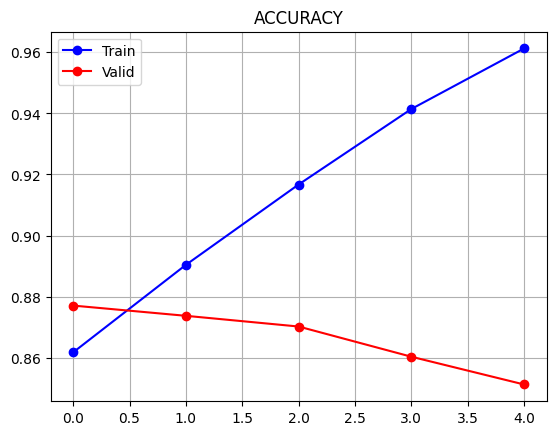

In [44]:
plt.plot(history.history['accuracy'], 'bo-', label='Train')
plt.plot(history.history['val_accuracy'], 'ro-', label='Valid')
plt.grid()
plt.legend()
plt.title('ACCURACY')

### *we can see the best epoch is equal 2*

## change the wrong label_id of test data and ealuate the model on test data againg

In [50]:
indexes= pd.read_csv('idx.csv')['0'].tolist()

In [54]:
label2id

{'SAD': 1, 'HAPPY': 0}

In [60]:
test_df_new=test_df.copy()

In [61]:
test_df_new.loc[indexes,'label_id']=1

In [63]:
test_df_new.head()

,comment,label_id
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,1
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,0
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,1
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,1
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,1


In [64]:
# after you fix the labels of test set:
# this indexes get from the pytorch iimplementation and show the index of records that have flase label_id

x_test_fix, y_test_fix = test_df_new['comment'].values.tolist(), test_df_new['label_id'].values.tolist()

[xtest_new, ytest_new], test_examples_new = make_examples(tokenizer, x_test_fix, y_test_fix, maxlen=50, is_tf_dataset=False)

new_predictions = model.predict(xtest_new)
ypred_new = new_predictions[0].argmax(axis=-1).tolist()

print(classification_report(ytest_new, ypred_new, target_names=['SAD', 'HAPPY']))

# we can see the 3% improvement of accuracy with convert label_id from happy to sad

  0%|          | 0/7000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/data/processors/glue.py:66: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)


  0%|          | 0/7000 [00:00<?, ?it/s]

219/219 [==============================] - 27s 124ms/step
              precision    recall  f1-score   support

         SAD       0.86      0.92      0.89      3231
       HAPPY       0.92      0.87      0.89      3769

    accuracy                           0.89      7000
   macro avg       0.89      0.89      0.89      7000
weighted avg       0.89      0.89      0.89      7000

